In [ ]:
from google.colab import files


uploaded = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


In [ ]:
# import regular libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import models from Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# import data
from sklearn.datasets import load_breast_cancer



In [ ]:
# save and view the data set 
data = load_breast_cancer()

data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# let‘s see the keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# let‘s look at DESCR key‘s value
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [ ]:
# Turn the feature data into a dataframe
df = pd.DataFrame(data.data, 
                  columns = data.feature_names)

# Add the target columns, and fill it with the target data
df["target"] = data.target

# Show the dataframe
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# See the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
# see the target value counts
df["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

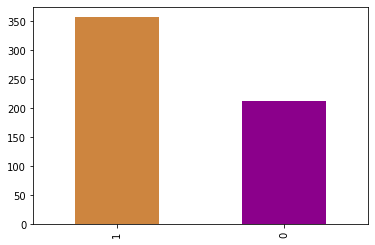

In [ ]:
# plot value counts
df["target"].value_counts().plot(kind="bar", color=["peru", "darkmagenta"]);

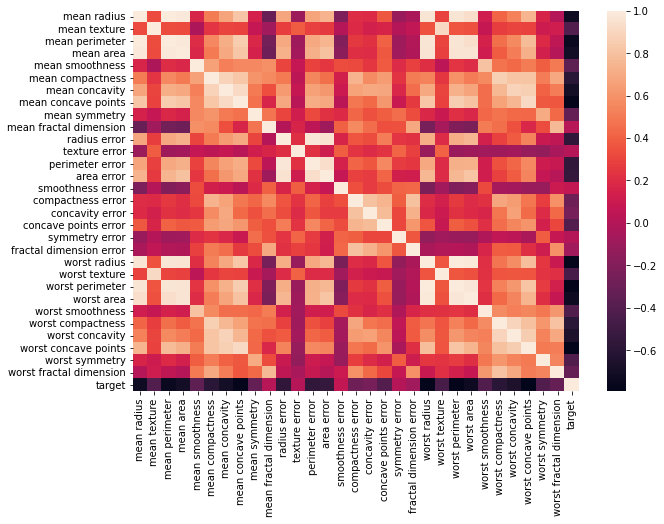

In [ ]:
# Make the correlation matrix 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix)

In [ ]:
# store data in X and y variables
X = data.data
y = data.target

# Split the data using Scikit-Learn‘s train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
# Create a dictionary of machine learning algorithms

models = {"Logistic regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Linear SVC": LinearSVC(),
          "Random Forest": RandomForestClassifier()}

 # Create a funtion to train (fit) and score models
def train_score(models, X_train, X_test, y_train, y_test):
  # Set random seed
  np.random.seed(0)
  # Make an empty dictionary for model scores
  scores = {}  
  # Loop through models
  for name, model in models.items():
      #Fit the model to the data
      model.fit(X_train, y_train)
      #Evaluate the model and append its score to the scores dictionary
      scores[name] = model.score(X_test, y_test)
  return scores

In [ ]:
# let‘s try the function
scores = train_score(models = models,
                   X_train = X_train,
                   X_test = X_test,
                   y_train = y_train,
                   y_test = y_test)

scores

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic regression': 0.9473684210526315,
 'KNN': 0.9385964912280702,
 'Linear SVC': 0.9385964912280702,
 'Random Forest': 0.9649122807017544}

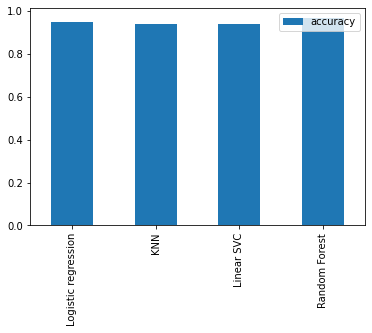

In [ ]:
# Model comparison
model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.T.plot.bar();

In [ ]:
# Hyperparameter grid for RandomForest model
rf_grid = {"n_estimators":np.arange(10, 1000, 20),
           "max_depth":[None, 3, 5, 10],
           "max_features":["sqrt", "log2", "auto"],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

In [ ]:
#Setup random hyperparameter search for RandomForest Classifier
random_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               n_jobs=-1,
                               random_state=0)
  
# Fit random hyperparameter model
random_rf.fit(X_train, y_train)


print(f"Train score: {random_rf.score(X_train, y_train)}")
print(f"Test score: {random_rf.score(X_test, y_test)}")

Train score: 0.9758241758241758
Test score: 0.9649122807017544


In [ ]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

In [ ]:
# Tune Logistic Regression

random_logr = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               random_state=0)

#Fit random hyperparameter search model for Logistic Regression
random_logr.fit(X_train, y_train)

print(f"Train score: {random_logr.score(X_train, y_train)}")
print(f"Test score: {random_logr.score(X_test, y_test)}")

Train score: 0.967032967032967
Test score: 0.956140350877193


In [ ]:
random_logr.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# import Standard Scaler
from sklearn.preprocessing import StandardScaler

# instantiate Standard Scaler
sc = StandardScaler()

# fit on our train data
sc.fit(X_train)

# transform ans store scaled train and test data in new variables
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# original train data array
X_train

array([[1.005e+01, 1.753e+01, 6.441e+01, ..., 6.499e-02, 2.894e-01,
        7.664e-02],
       [1.080e+01, 2.198e+01, 6.879e+01, ..., 7.485e-02, 2.965e-01,
        7.662e-02],
       [1.614e+01, 1.486e+01, 1.043e+02, ..., 1.129e-01, 2.778e-01,
        7.012e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [ ]:
# scaled train data array
X_train_std

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [ ]:
# make a dictionary of our models
models = {"Logistic regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# use the function for model fitting and socring that we created earlier
scores_scaled = train_score(models = models,
                   X_train = X_train_std,
                   X_test = X_test_std,
                   y_train = y_train,
                   y_test = y_test)

scores_scaled

{'Logistic regression': 0.9649122807017544,
 'KNN': 0.956140350877193,
 'Random Forest': 0.9649122807017544}

In [ ]:
scores

{'Logistic regression': 0.9473684210526315,
 'KNN': 0.9385964912280702,
 'Linear SVC': 0.9385964912280702,
 'Random Forest': 0.9649122807017544}

In [ ]:
#Fit random hyperparameter search model for Logistic Regression
random_logr.fit(X_train_std, y_train)

print(f"Train score: {random_logr.score(X_train_std, y_train)}")
print(f"Test score: {random_logr.score(X_test_std, y_test)}")

Train score: 0.989010989010989
Test score: 0.9649122807017544


In [ ]:
# Check best parameters
random_logr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [ ]:
# Use parameters as the best model
best_logr = LogisticRegression()
best_logr.set_params(**random_logr.best_params_)

# Fit best model
best_logr.fit(X_train_std, y_train)

#Score best model
best_logr.score(X_test_std, y_test)

0.9649122807017544

In [ ]:
# Fit random hyperparameter model for Random Forest
random_rf.fit(X_train_std, y_train)


print(f"Train score: {random_rf.score(X_train_std, y_train)}")
print(f"Test score: {random_rf.score(X_test_std, y_test)}")

Train score: 0.9824175824175824
Test score: 0.956140350877193


In [ ]:
# Check best parameters
random_rf.best_params_

{'n_estimators': 830,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 10}

In [ ]:
# Use parameters for the best model
best_rf = RandomForestClassifier()
best_rf.set_params(**random_rf.best_params_)

# Fit best model
best_rf.fit(X_train_std, y_train)

# Score best model
best_rf.score(X_test_std, y_test)

0.956140350877193

In [ ]:
# make a grid for knn

knn_grid = {"n_neighbors" : np.arange(1,21,2),
            "weights" : ["uniform", "distance"],
            "metric" : ["euclidean", "manhattan", "minkowski"]}


#Setup random hyperparameter search for KNN

knn = RandomizedSearchCV(KNeighborsClassifier(),
                         param_distributions=knn_grid,
                         cv=5,
                         n_iter=20,
                         n_jobs=-1,
                         random_state=0)
  
# Fit random hyperparameter model
knn.fit(X_train_std, y_train)


print(f"Train score: {random_rf.score(X_train_std, y_train)}")
print(f"Test score: {random_rf.score(X_test_std, y_test)}")

Train score: 0.9824175824175824
Test score: 0.956140350877193


In [ ]:
# make a grid for knn

knn_grid = {"n_neighbors" : np.arange(1,21,2),
            "weights" : ["uniform", "distance"],
            "metric" : ["euclidean", "manhattan", "minkowski"]}


#Setup random hyperparameter search for KNN

knn = RandomizedSearchCV(KNeighborsClassifier(),
                         param_distributions=knn_grid,
                         cv=5,
                         n_iter=20,
                         n_jobs=-1,
                         random_state=0)
  
# Fit random hyperparameter model
knn.fit(X_train_std, y_train)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [ ]:
# Use parameters for the best model
best_knn = KNeighborsClassifier()
best_knn.set_params(**knn.best_params_)

# Fit best model
best_knn.fit(X_train_std, y_train)

# Score best model
best_knn.score(X_test_std, y_test)

0.9473684210526315

In [ ]:
# make predictions
y_preds_rf = best_rf.predict(X_test_std)
y_preds_lr = best_logr.predict(X_test_std)
y_preds_knn = best_knn.predict(X_test_std)

# create a dictionary of preds and true labels
dict = {"Random Forest": {"predictions": y_preds_rf, "true labels": y_test},
        "Logistic Regression" : {"predictions": y_preds_lr, "true labels": y_test},
        "KNN": {"predictions": y_preds_knn, "true labels": y_test}
        }

# make a dataframe with predictions and true labels
df = pd.DataFrame(dict)

In [ ]:
df.head(10)

,Random Forest,Logistic Regression,KNN
predictions,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, ..."
true labels,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
# Confusion matrix
print(f"Random Forest: \n{confusion_matrix(y_test, y_preds_rf)}")
print(f"Logistic Regression: \n{confusion_matrix(y_test, y_preds_lr)}")
print(f"KNN: \n{confusion_matrix(y_test, y_preds_knn)}")

Random Forest: 
[[45  2]
 [ 3 64]]
Logistic Regression: 
[[45  2]
 [ 2 65]]
KNN: 
[[43  4]
 [ 2 65]]


Random Forest
Logistic Regression
KNN


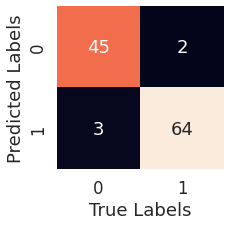

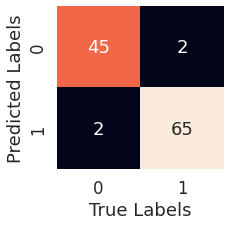

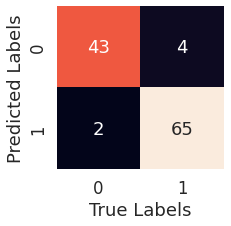

In [ ]:
# Make it more visual with seaborn
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
  """
  Plots a nice looking confusion matrix using seaborn heatmap()
  """
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("True Labels")
  plt.ylabel("Predicted Labels")

print("Random Forest")
plot_conf_mat(y_test, y_preds_rf)

print("Logistic Regression")
plot_conf_mat(y_test, y_preds_lr)

print("KNN")
plot_conf_mat(y_test, y_preds_knn)
